In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/diamonds_raw.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(50000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [5]:
categoricals = ['cut', 'color', 'clarity']
categoricals

['cut', 'color', 'clarity']

In [6]:
for category in categoricals :

    print(df[category].value_counts(), '\n')

cut
Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: count, dtype: int64 

color
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: count, dtype: int64 

clarity
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: count, dtype: int64 



In [7]:
numericals = df.drop(columns = categoricals).columns.tolist()
numericals

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [8]:
pd.DataFrame(data = df, columns = numericals).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,50000.0,0.799444,0.475173,0.2,0.40,0.70,1.04,5.01
depth,50000.0,61.753006,1.431088,43.0,61.00,61.80,62.50,79.00
table,50000.0,57.457830,2.232092,43.0,56.00,57.00,59.00,95.00
price,50000.0,3944.805440,3997.938105,326.0,951.00,2410.00,5351.00,18823.00
x,50000.0,5.734403,1.123077,0.0,4.71,5.70,6.54,10.74
y,50000.0,5.737956,1.145579,0.0,4.72,5.71,6.54,58.90
z,50000.0,3.541056,0.707065,0.0,2.91,3.53,4.04,31.80


In [8]:
len(df.query('x == 0 | y == 0 | z == 0'))

17

In [9]:
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]
len(df)

49983

In [10]:
# Extracting 10% of non-preprocessed dataset for testing the entire solution

df = df.sample(frac = 1)
test_df = df.iloc[:5000].copy()
len(test_df)

5000

In [11]:
test_df.to_csv('../data/diamonds_test_data.csv')

In [12]:
import json

with open('../data/metadata.json', 'r') as file:
    metadata = json.load(file)

print("Variables' description: \n")
print(json.dumps(metadata, indent = 4))

Variables' description: 

{
    "metadata": {
        "carat": "diamond weight in carat",
        "cut": "diamond cutting qualityuring",
        "color": "diamond color from J (worst) to D (best)",
        "clarity": "measure of diamond clarity (from left to right is worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)",
        "depth": "percentage depth that is equal to z / mean(x,y)",
        "table": "width of the widest point at the top of the diamond",
        "price": "diamond price",
        "x": "diamond length in mm",
        "y": "diamond width in mm",
        "z": "diamond depth in mm"
    }
}


Categorical features (cut, color, clarity) are ordinal, so can be mapped with numerical features instead converting into dummy variables.

In [13]:
#Mapping cut classes with numerics

cut_class = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal' ]
cut_numeric = list(range(1, 6))

color_class = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
color_numeric = list(range(8, 1, -1))

clarity_class = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_numeric = list(range(1, 9))

In [15]:
maps = ['cut_map', 'color_map', 'clarity_map']
classes = [cut_class, color_class, clarity_class]
numerics = [cut_numeric, color_numeric, clarity_numeric]

for map_name, clas, numeric in zip(maps, classes, numerics):
    globals()[map_name] = dict(zip(clas, numeric))

print("cut_map:", cut_map)
print("color_map:", color_map)
print("clarity_map:", clarity_map)
        

cut_map: {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_map: {'D': 8, 'E': 7, 'F': 6, 'G': 5, 'H': 4, 'I': 3, 'J': 2}
clarity_map: {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}


In [16]:
mappings = {
    'cut_map': {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5},
    'color_map': {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1},
    'clarity_map': {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
}

with open('../data/mappings.json', 'w') as f:
    json.dump(mappings, f, indent = 4)

In [20]:
new_df = df.iloc[5000:].copy()

new_df['cut'] = new_df['cut'].map(cut_map)
new_df['color'] = new_df['color'].map(color_map)
new_df['clarity'] = new_df['cut'].replace(clarity_map) #why .map() is generating NaN here??

new_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
48063,0.73,5,3,5,61.9,56.0,2426,5.77,5.82,3.59
19867,1.63,2,3,2,63.7,58.0,9556,7.40,7.48,4.74
14448,1.00,4,7,4,59.9,59.0,6272,6.45,6.38,3.84
33555,0.40,5,5,5,62.6,57.0,931,4.68,4.75,2.95
28605,0.33,5,4,5,61.4,57.0,743,4.49,4.44,2.74


In [21]:
len(new_df)

44983

In [22]:
new_df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.136395,-0.290011,-0.136395,0.029525,0.183429,0.921649,0.977604,0.949532,0.976060
cut,-0.136395,1.000000,0.018288,1.000000,-0.221386,-0.434360,-0.054985,-0.127491,-0.122784,-0.153808
color,-0.290011,0.018288,1.000000,0.018288,-0.046304,-0.028831,-0.171822,-0.269272,-0.261320,-0.273320
clarity,-0.136395,1.000000,0.018288,1.000000,-0.221386,-0.434360,-0.054985,-0.127491,-0.122784,-0.153808
depth,0.029525,-0.221386,-0.046304,-0.221386,1.000000,-0.296771,-0.010687,-0.024331,-0.028535,0.097217
table,0.183429,-0.434360,-0.028831,-0.434360,-0.296771,1.000000,0.129855,0.197699,0.185212,0.157489
price,0.921649,-0.054985,-0.171822,-0.054985,-0.010687,0.129855,1.000000,0.887632,0.864321,0.882100
x,0.977604,-0.127491,-0.269272,-0.127491,-0.024331,0.197699,0.887632,1.000000,0.970481,0.990658
y,0.949532,-0.122784,-0.261320,-0.122784,-0.028535,0.185212,0.864321,0.970481,1.000000,0.968223
z,0.976060,-0.153808,-0.273320,-0.153808,0.097217,0.157489,0.882100,0.990658,0.968223,1.000000


INSIGHT : carat, x, y, z are very strongly correlated with each other, as also with terget variable - price. It is worth examining whether clusters derived upon these criterions will be better to train models dedicated for particular size class. Maybe this approach will improve performance of models (i.e. RMSE to mean)

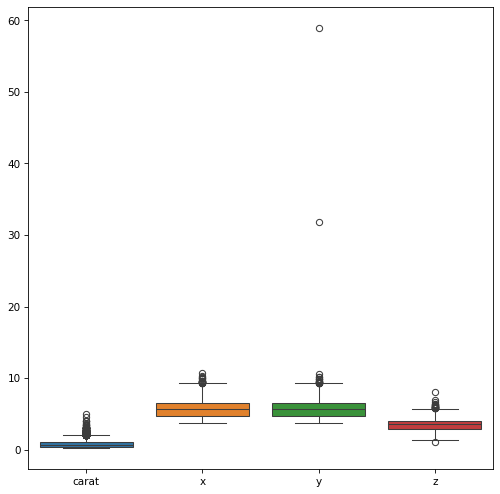

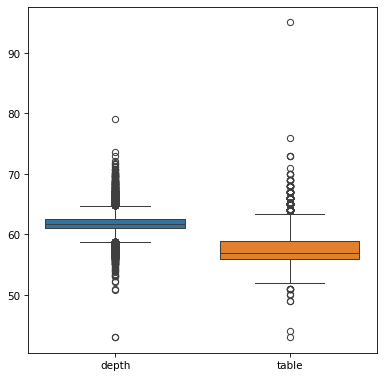

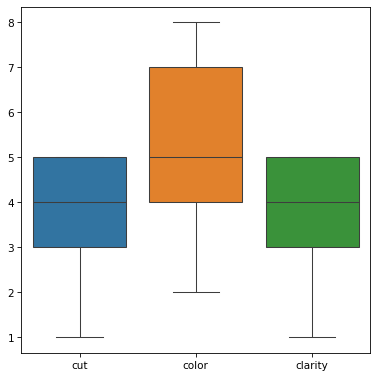

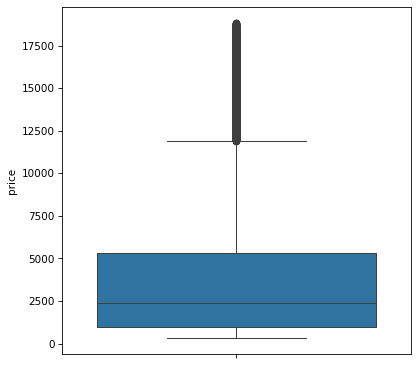

In [41]:
#First look at outliers

import matplotlib.pyplot as plt
import seaborn as sns

#Dividing plots due to different values' ranges

plt.figure(figsize = (8, 8), dpi = 75)
sns.boxplot(data = new_df.drop(columns = ['cut', 'color', 'clarity', 'price', 'depth', 'table'], axis = 1))
plt.show();

plt.figure(figsize = (6, 6), dpi = 75)
sns.boxplot(data = new_df.drop(columns = ['cut', 'color', 'clarity', 'price', 'carat', 'x', 'y', 'z'], axis = 1))
plt.show()

plt.figure(figsize = (6, 6), dpi = 75)
sns.boxplot(data = new_df.drop(columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], axis = 1))
plt.show();

plt.figure(figsize = (6, 6), dpi = 75)
sns.boxplot(data = new_df['price'])
plt.show();

In [24]:
len(new_df.query('price > 12000'))

2906

In [25]:
def histogram(feature : str, bins : int) :

    plt.figure(figsize = (12, 4), dpi = 75)
    sns.histplot(df[feature], bins = bins)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show();

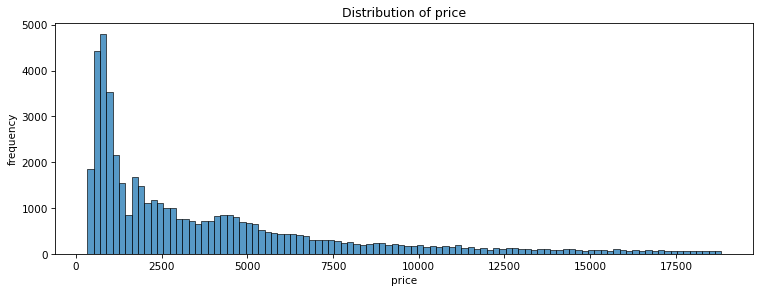

In [26]:
histogram('price', 100)

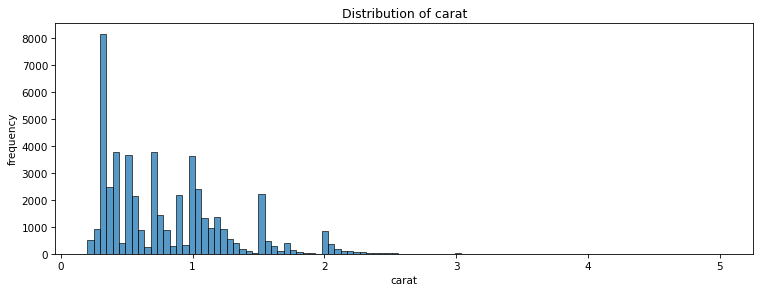

In [27]:
histogram('carat', 100)

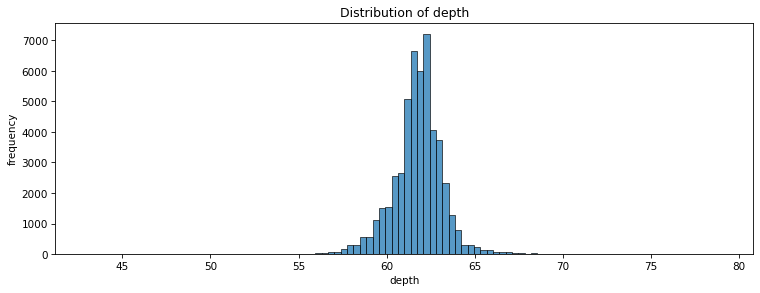

In [28]:
histogram('depth', 100)

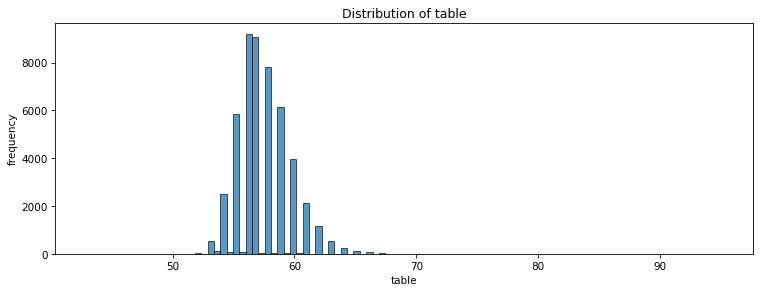

In [29]:
histogram('table', 100)

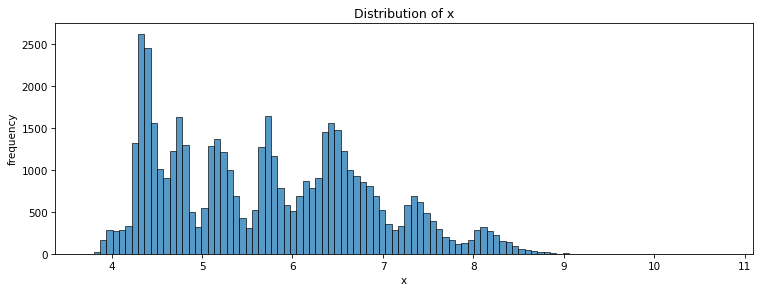

In [30]:
histogram('x', 100)

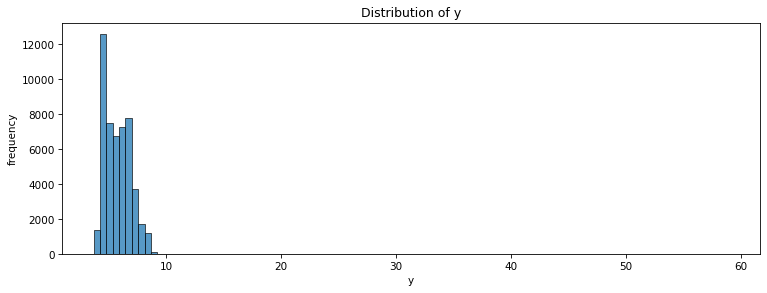

In [31]:
histogram('y', 100)

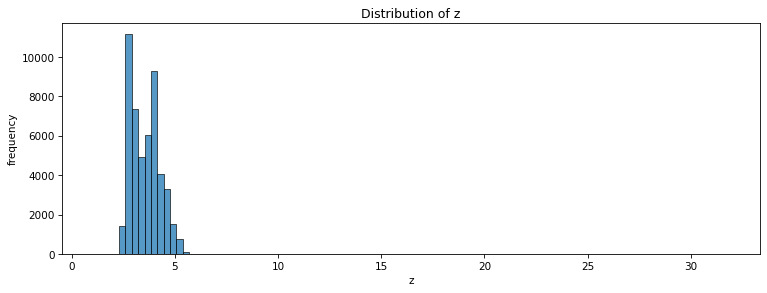

In [32]:
histogram('z',100)

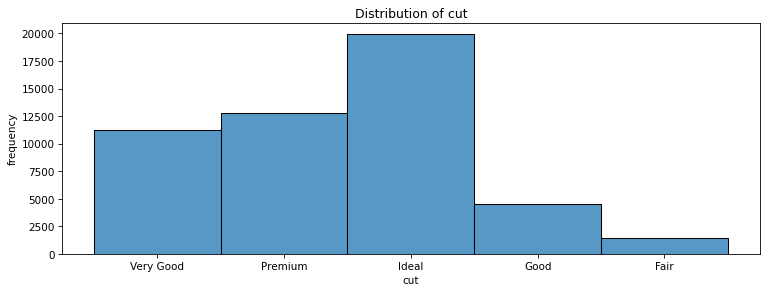

In [33]:
histogram('cut', 5)

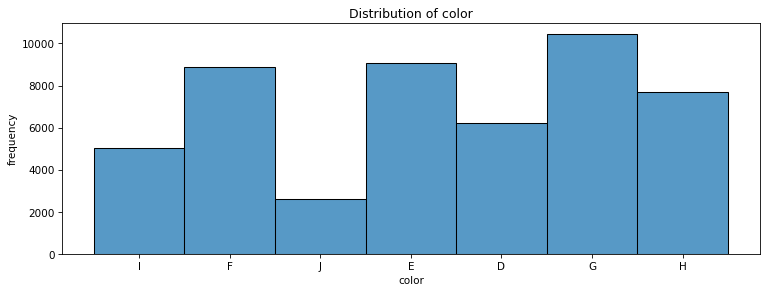

In [34]:
histogram('color', 7)

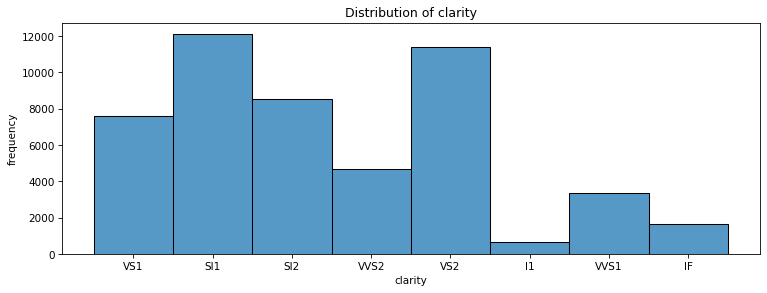

In [35]:
histogram('clarity', 8)

In [36]:
new_df.to_csv('../data/diamonds_preprocessed.csv', index = False)

# To do next in _dev :
- analyze data via clustering
- experiment with models